In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

[[154  69  85]
 [ 54  62  51]
 [ 92  61 109]]
              precision    recall  f1-score   support

           1       0.51      0.50      0.51       308
           2       0.32      0.37      0.35       167
           3       0.44      0.42      0.43       262

    accuracy                           0.44       737
   macro avg       0.43      0.43      0.43       737
weighted avg       0.45      0.44      0.44       737

WITH K=1


[[154  69  85]
 [ 54  62  51]
 [ 92  61 109]]


              precision    recall  f1-score   support

           1       0.51      0.50      0.51       308
           2       0.32      0.37      0.35       167
           3       0.44      0.42      0.43       262

    accuracy                           0.44       737
   macro avg       0.43      0.43      0.43       737
weighted avg       0.45      0.44      0.44       737

WITH K=40


[[206  30  72]
 [ 69  59  39]
 [129  43  90]]


              precision    recall  f1-score   support

           1      

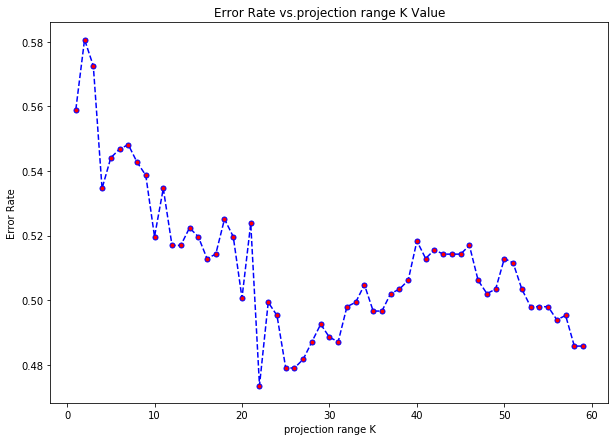

In [36]:
df = pd.read_csv('C:\\Users\\abc86\\Desktop\\(DM)Datamaining\\作業一\\避孕資料.csv', index_col=0)
df.head()

scaler = StandardScaler()
scaler.fit(df.drop("Contraceptive method used",axis=1))
scaled_features = scaler.transform(df.drop('Contraceptive method used',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

X = df_feat
y = df['Contraceptive method used']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50,random_state=300)

#從k值=1開始測試
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

# 剛剛只先用了k=1來建立模型，現在利用for loop來建立迴圈，選擇k值
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


#將k=1~60的錯誤率製圖畫出。之後 才會做k=23之後，錯誤率就在5%-6%之間震盪，
plt.figure(figsize=(10,7))  # 這邊是設定資料呈現的(寬, 高)
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs.projection range K Value')
plt.xlabel('projection range K')
plt.ylabel('Error Rate')

#跟一開始k=1做比較
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


#擇錯誤率最低的K=40來看precision、recall、f1-score、support表現
knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train,y_train)
pred = knn.predict(X_test) 


print('WITH K=40')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

In [13]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [14]:
tree.predict(X_test)

array([1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 3, 3, 3, 1, 3, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 3, 1, 2, 1, 1, 3, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 2, 3, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 1, 2, 2, 3, 2, 3, 1, 1, 2, 2, 3, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 3, 1, 3, 2, 2, 2, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1,
       3, 1, 1, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       1, 3, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1,
       2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 3, 1, 2,

In [7]:
y_test

Wifes age
27    3
29    2
29    3
22    3
32    1
28    1
36    3
22    3
32    2
21    3
31    1
35    2
37    2
20    1
17    3
21    3
45    1
26    3
34    3
32    1
29    3
45    1
35    1
32    3
32    2
36    2
30    1
45    2
47    1
40    1
     ..
39    1
33    2
30    3
33    3
22    3
44    2
21    3
24    1
25    1
21    1
27    3
47    1
37    1
25    2
29    2
40    2
44    1
42    1
49    1
26    1
25    1
30    3
28    2
30    1
46    1
38    2
24    3
21    3
20    3
36    2
Name: Contraceptive method used, Length: 737, dtype: int64

In [8]:
X_test

,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working,Husband's occupation,Standard-of-living index,Media exposure
902,0.040814,0.698793,-0.534990,0.419021,0.578134,-1.316056,-0.137053,-0.282687
499,1.026376,0.698793,-0.959123,0.419021,-1.729702,-0.159403,0.887716,-0.282687
932,-0.944748,-0.526590,0.313277,0.419021,0.578134,0.997250,-1.161823,-0.282687
763,0.040814,0.698793,-0.110856,0.419021,0.578134,-0.159403,-0.137053,-0.282687
225,1.026376,0.698793,0.313277,0.419021,-1.729702,-1.316056,-0.137053,-0.282687
229,0.040814,0.698793,-1.383257,0.419021,0.578134,0.997250,-1.161823,-0.282687
941,-1.930310,-0.526590,1.161544,0.419021,0.578134,0.997250,-1.161823,-0.282687
787,-0.944748,-1.751973,-0.534990,0.419021,0.578134,-0.159403,-0.137053,-0.282687
575,1.026376,0.698793,0.313277,-2.386515,-1.729702,-0.159403,0.887716,-0.282687
995,-0.944748,-2.977356,-0.110856,0.419021,-1.729702,0.997250,-2.186593,3.537480


In [9]:
X_train

,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working,Husband's occupation,Standard-of-living index,Media exposure
72,-0.944748,-0.526590,-0.959123,0.419021,0.578134,-1.316056,-2.186593,-0.282687
1424,-0.944748,0.698793,-0.534990,0.419021,0.578134,0.997250,-1.161823,-0.282687
1401,0.040814,0.698793,-0.110856,0.419021,0.578134,0.997250,-0.137053,-0.282687
940,-0.944748,0.698793,0.313277,0.419021,0.578134,0.997250,0.887716,-0.282687
270,1.026376,0.698793,-0.534990,0.419021,0.578134,-1.316056,0.887716,-0.282687
1344,0.040814,-0.526590,3.282212,0.419021,0.578134,-1.316056,-1.161823,-0.282687
540,0.040814,-0.526590,-0.959123,0.419021,-1.729702,0.997250,0.887716,-0.282687
968,0.040814,0.698793,0.737411,0.419021,0.578134,-1.316056,0.887716,-0.282687
1159,0.040814,0.698793,-0.534990,-2.386515,0.578134,0.997250,0.887716,-0.282687
531,0.040814,-0.526590,2.009811,0.419021,0.578134,-0.159403,-0.137053,-0.282687


In [16]:
from sklearn import tree

In [17]:
clf = tree.DecisionTreeClassifier()

In [18]:
ds_clf = clf.fit(X_train, y_train)

In [19]:
y_test_predicted = ds_clf.predict(X_test)

In [20]:
from sklearn import metrics

In [21]:
accuracy = metrics.accuracy_score(y_test,y_test_predicted)

In [22]:
print(accuracy)

0.4369063772048847


In [23]:
clf = tree.DecisionTreeClassifier()

In [24]:
ds_clf2 = clf.fit(X_train, y_train) 

In [25]:
y_test_predicted = ds_clf2.predict(X_test)

In [26]:
print(y_test_predicted)

[3 1 1 2 2 1 1 3 2 1 3 1 2 1 1 3 2 1 1 1 3 1 1 2 1 1 1 3 2 1 1 1 1 2 3 2 1
 1 1 1 1 1 1 3 2 1 3 3 1 2 1 3 3 1 3 1 1 2 2 3 3 1 3 3 3 1 3 1 3 3 3 1 1 1
 1 2 3 2 3 2 1 2 2 1 1 1 3 1 2 2 3 3 1 1 3 2 1 2 1 3 1 2 1 1 1 1 3 1 1 1 2
 2 1 1 3 2 3 1 3 1 3 1 3 1 1 1 3 1 3 2 3 3 1 2 1 1 1 3 1 3 1 3 1 1 3 3 1 3
 1 3 3 2 1 2 2 1 3 1 2 2 1 1 1 1 1 1 1 2 2 1 1 2 2 1 2 3 1 1 1 3 3 1 3 1 3
 2 1 1 1 1 1 1 2 3 1 3 1 1 2 2 1 3 3 1 1 3 3 3 2 1 3 1 2 2 3 3 1 1 1 3 1 2
 3 1 1 1 2 1 1 2 1 1 2 3 3 1 1 3 1 3 1 3 1 1 2 2 1 3 2 3 1 1 1 1 1 1 2 1 1
 1 2 1 3 2 2 3 1 2 1 3 3 2 1 1 3 1 3 3 3 1 3 3 1 3 3 3 1 3 1 3 3 3 1 1 1 1
 3 1 2 2 2 3 3 1 3 1 2 1 3 3 3 3 1 3 1 1 2 2 1 2 2 1 2 1 3 3 1 2 2 3 3 1 1
 1 2 3 3 1 1 1 2 1 1 3 1 2 1 3 3 3 2 1 3 2 1 1 3 2 3 1 3 1 2 3 3 3 1 1 1 3
 3 1 1 3 1 3 3 3 3 1 1 3 3 1 2 1 1 1 3 3 1 1 3 2 1 1 3 2 1 1 3 1 3 3 1 3 1
 2 1 3 1 1 3 1 2 1 3 1 1 3 1 1 1 1 3 3 3 3 3 1 2 3 1 1 1 1 1 2 1 2 1 3 1 1
 1 1 1 3 2 1 1 2 1 1 1 3 3 2 1 1 3 3 3 2 2 3 2 3 1 3 1 1 3 3 2 2 1 2 2 2 1
 2 1 3 3 2 3 3 3 3 3 1 1 

In [27]:
print(y_test)

Wifes age
27    3
29    2
29    3
22    3
32    1
28    1
36    3
22    3
32    2
21    3
31    1
35    2
37    2
20    1
17    3
21    3
45    1
26    3
34    3
32    1
29    3
45    1
35    1
32    3
32    2
36    2
30    1
45    2
47    1
40    1
     ..
39    1
33    2
30    3
33    3
22    3
44    2
21    3
24    1
25    1
21    1
27    3
47    1
37    1
25    2
29    2
40    2
44    1
42    1
49    1
26    1
25    1
30    3
28    2
30    1
46    1
38    2
24    3
21    3
20    3
36    2
Name: Contraceptive method used, Length: 737, dtype: int64


In [28]:
df.head()

,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
Wifes age,,,,,,,,,
24,2,3,3,1,1,2,3,0,1
45,1,3,10,1,1,3,4,0,1
43,2,3,7,1,1,3,4,0,1
42,3,2,9,1,1,3,3,0,1
36,3,3,8,1,1,3,2,0,1


In [31]:
df.head()

,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
Wifes age,,,,,,,,,
24,2,3,3,1,1,2,3,0,1
45,1,3,10,1,1,3,4,0,1
43,2,3,7,1,1,3,4,0,1
42,3,2,9,1,1,3,3,0,1
36,3,3,8,1,1,3,2,0,1


Text(0, 0.5, 'Contraceptive method used')

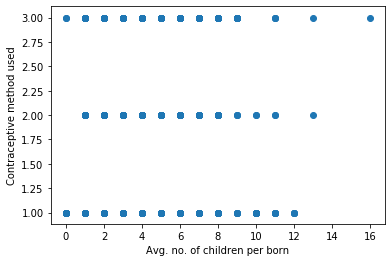

In [8]:
plt.scatter(x=df['Number of children ever born'],y=df['Contraceptive method used'])
plt.xlabel('Avg. no. of children per born')
plt.ylabel('Contraceptive method used')

In [9]:
df.head()

,Wife education,Husband education,Number of children ever born,Wife religion,Wife now working,Husband occupation,Standard-of-living index,Media exposure,Contraceptive method used
Wifes age,,,,,,,,,
24,2,3,3,1,1,2,3,0,1
45,1,3,10,1,1,3,4,0,1
43,2,3,7,1,1,3,4,0,1
42,3,2,9,1,1,3,3,0,1
36,3,3,8,1,1,3,2,0,1


In [10]:
df.head()

,Wife education,Husband education,Number of children ever born,Wife religion,Wife now working,Husband occupation,Standard-of-living index,Media exposure,Contraceptive method used
Wifes age,,,,,,,,,
24,2,3,3,1,1,2,3,0,1
45,1,3,10,1,1,3,4,0,1
43,2,3,7,1,1,3,4,0,1
42,3,2,9,1,1,3,3,0,1
36,3,3,8,1,1,3,2,0,1


In [15]:
df.head()

,Wife education,Husband education,Number of children ever born,Wife religion,Wife now working,Husband occupation,Standard-of-living index,Media exposure,Contraceptive method used
24,2,3,3,1,1,2,3,0,1
45,1,3,10,1,1,3,4,0,1
43,2,3,7,1,1,3,4,0,1
42,3,2,9,1,1,3,3,0,1
36,3,3,8,1,1,3,2,0,1


In [18]:
df.head()

,Wife education,Husband education,Number of children ever born,Wife religion,Wife now working,Husband occupation,Standard-of-living index,Media exposure,Contraceptive method used
age,,,,,,,,,
24,2,3,3,1,1,2,3,0,1
45,1,3,10,1,1,3,4,0,1
43,2,3,7,1,1,3,4,0,1
42,3,2,9,1,1,3,3,0,1
36,3,3,8,1,1,3,2,0,1


In [19]:
df.head()

,Wife education,Husband education,Number of children ever born,Wife religion,Wife now working,Husband occupation,Standard-of-living index,Media exposure,Contraceptive method used
age,,,,,,,,,
24,2,3,3,1,1,2,3,0,1
45,1,3,10,1,1,3,4,0,1
43,2,3,7,1,1,3,4,0,1
42,3,2,9,1,1,3,3,0,1
36,3,3,8,1,1,3,2,0,1


In [22]:
df.head()

,Wife education,Husband education,Number of children ever born,Wife religion,Wife now working,Husband occupation,Standard-of-living index,Media exposure,Contraceptive method used
24,2,3,3,1,1,2,3,0,1
45,1,3,10,1,1,3,4,0,1
43,2,3,7,1,1,3,4,0,1
42,3,2,9,1,1,3,3,0,1
36,3,3,8,1,1,3,2,0,1


In [25]:
df.head()

,Wife education,Husband education,Number of children ever born,Wife religion,Wife now working,Husband occupation,Standard-of-living index,Media exposure,Contraceptive method used
age,,,,,,,,,
24,2,3,3,1,1,2,3,0,1
45,1,3,10,1,1,3,4,0,1
43,2,3,7,1,1,3,4,0,1
42,3,2,9,1,1,3,3,0,1
36,3,3,8,1,1,3,2,0,1


In [31]:
df.head()

,age,Wife education,Husband education,Number of children ever born,Wife religion,Wife now working,Husband occupation,Standard-of-living index,Media exposure,Contraceptive method used
0.0,24.0,2.0,3.0,3.0,1.0,1.0,2.0,3.0,0.0,1.0
1.0,45.0,1.0,3.0,10.0,1.0,1.0,3.0,4.0,0.0,1.0
2.0,43.0,2.0,3.0,7.0,1.0,1.0,3.0,4.0,0.0,1.0
3.0,42.0,3.0,2.0,9.0,1.0,1.0,3.0,3.0,0.0,1.0
4.0,36.0,3.0,3.0,8.0,1.0,1.0,3.0,2.0,0.0,1.0


In [38]:
df.head()

,Wife education,Husband education,Number of children ever born,Wife religion,Wife now working,Husband occupation,Standard-of-living index,?Media exposure,Contraceptive method used
age,,,,,,,,,
24,2,3,3,1,1,2,3,0,1
45,1,3,10,1,1,3,4,0,1
43,2,3,7,1,1,3,4,0,1
42,3,2,9,1,1,3,3,0,1
36,3,3,8,1,1,3,2,0,1
